### 데이터 가져오기

In [17]:
import pandas as pd
import matplotlib as mpl # 그림 그리기
import matplotlib.pylab as plt # 그림 그리기
import seaborn as sns 
import numpy as np

In [18]:
plt.rc('font', family = 'Malgun Gothic')

In [19]:
df2 = pd.read_csv('./save/data1.csv')
df2

,Unnamed: 0,관광지명,도로명주소,중분류 카테고리,소분류 카테고리,구군명,구군명(영어)
0,0,해동용궁사,부산 기장군 용궁길 86-0,역사관광지,절,기장군,Gijang-gun
1,1,장안사,부산 기장군 장안로 482-0,역사관광지,절,기장군,Gijang-gun
2,2,아홉산숲,부산 기장군 미동길 37-1,휴양관광지,동식물원,기장군,Gijang-gun
3,3,국립부산과학관,부산 기장군 동부산관광6로 59-0,문화시설,과학관,기장군,Gijang-gun
4,4,아난티코브,부산 기장군 기장해안로 268-32,휴양관광지,종합위락시설,기장군,Gijang-gun
...,...,...,...,...,...,...,...
1377,1377,자화정사,부산 서구 천마로113번길 16-1,역사관광지,절,서구,Seo-gu
1378,1378,용문사,부산 서구 암남공원로 60-4,역사관광지,절,서구,Seo-gu
1379,1379,금수암,부산 서구 꽃마을로87번길 18-0,역사관광지,절,서구,Seo-gu
1380,1380,보문사,부산 서구 천마산로 227-0,역사관광지,절,서구,Seo-gu


## 데이터 정제

In [20]:
tt = df2.sort_values(['중분류 카테고리', '구군명'])
tt

,Unnamed: 0,관광지명,도로명주소,중분류 카테고리,소분류 카테고리,구군명,구군명(영어)
1016,1016,롯데시네마부산명지,부산 강서구 명지국제6로 107-0,공연/행사,극장,강서구,Gangseo-gu
1024,1024,CGV부산명지,부산 강서구 명지국제8로10번길 38-0,공연/행사,극장,강서구,Gangseo-gu
1031,1031,성원아트홀,부산 강서구 명지오션시티4로 88-0,공연/행사,공연장,강서구,Gangseo-gu
1068,1068,낙동강아트홀건축중(2023년하반기준공예정),부산 강서구,공연/행사,공연장,강서구,Gangseo-gu
376,376,롯데시네마오투,부산 금정구 중앙대로 1607-0,공연/행사,극장,금정구,Geumjeong-gu
...,...,...,...,...,...,...,...
225,225,해운대온천,부산 해운대구 중동1로 46-0,휴양관광지,온천,해운대구,Haeundae-gu
248,248,고려온천탕,부산 해운대구 중동1로19번길 24-0,휴양관광지,온천,해운대구,Haeundae-gu
260,260,반여화훼단지,부산 해운대구 선수촌로 290-0,휴양관광지,동식물원,해운대구,Haeundae-gu
276,276,파라다이스호텔온천,부산 해운대구 해운대해변로 296-0,휴양관광지,온천,해운대구,Haeundae-gu


In [21]:
ttt = tt.groupby(['중분류 카테고리', '구군명'])
ttt

In [22]:
new = ttt.size().reset_index(name='counts')
new

,중분류 카테고리,구군명,counts
0,공연/행사,강서구,4
1,공연/행사,금정구,11
2,공연/행사,기장군,8
3,공연/행사,남구,14
4,공연/행사,동구,4
...,...,...,...
58,휴양관광지,수영구,3
59,휴양관광지,연제구,1
60,휴양관광지,영도구,1
61,휴양관광지,중구,8


In [23]:
gg = df2.groupby(['구군명'])
ggg = gg.size().reset_index(name = 'counts')
ggg = ggg.sort_values(by = 'counts', ascending = False)
ggg

,구군명,counts
15,해운대구,159
2,기장군,153
1,금정구,133
6,부산진구,127
5,동래구,98
3,남구,85
4,동구,80
11,수영구,77
9,사하구,68
7,북구,65


## 그래프 작성

### 지역별 문화시설 분포

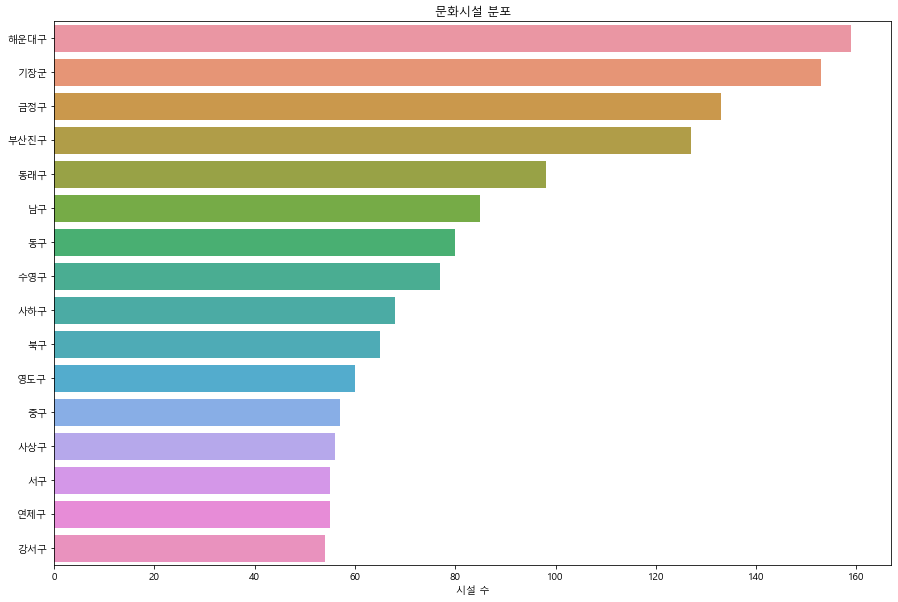

<Figure size 432x288 with 0 Axes>

In [27]:

cate = new['중분류 카테고리'].unique()

# 그래프 사이즈 설정
fig = plt.figure(figsize = (15, 10))

# x축 y축에 넣을 컬럼 설정 / 기반 데이터 설정
sns.barplot(y = '구군명', x = 'counts', data = ggg, orient = 'h')

# 그래프 제목 설정
plt.title('문화시설 분포')

# x, y축 이름 설정
plt.xlabel('시설 수')
plt.ylabel('')

# 출력
plt.show()
#plt.savefig('./counts1.png')

### 중분류 카테고리 별 지역분포량 

In [32]:
new = new.sort_values(by = '구군명', ascending = True)
new

new.loc[63] = ['공연/행사', '서구', 0]
new

,중분류 카테고리,구군명,counts
47,휴양관광지,강서구,1
0,공연/행사,강서구,4
31,역사관광지,강서구,28
15,문화시설,강서구,21
16,문화시설,금정구,43
...,...,...,...
30,문화시설,해운대구,74
14,공연/행사,해운대구,11
46,역사관광지,해운대구,58
62,휴양관광지,해운대구,16


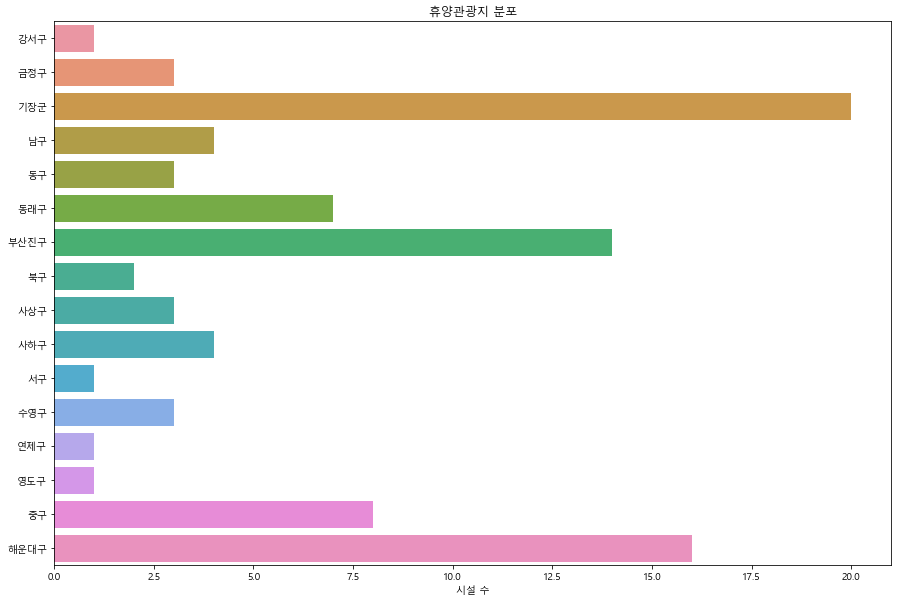

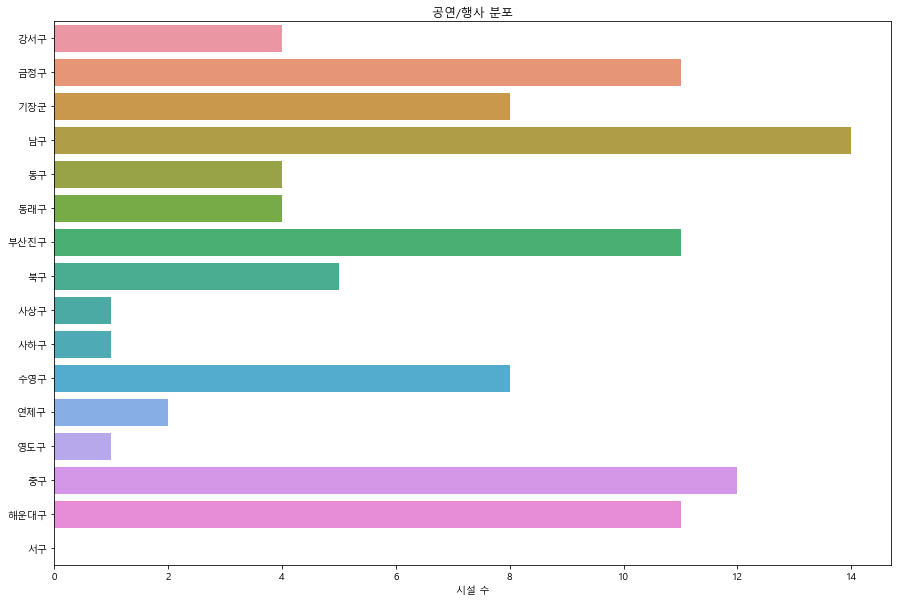

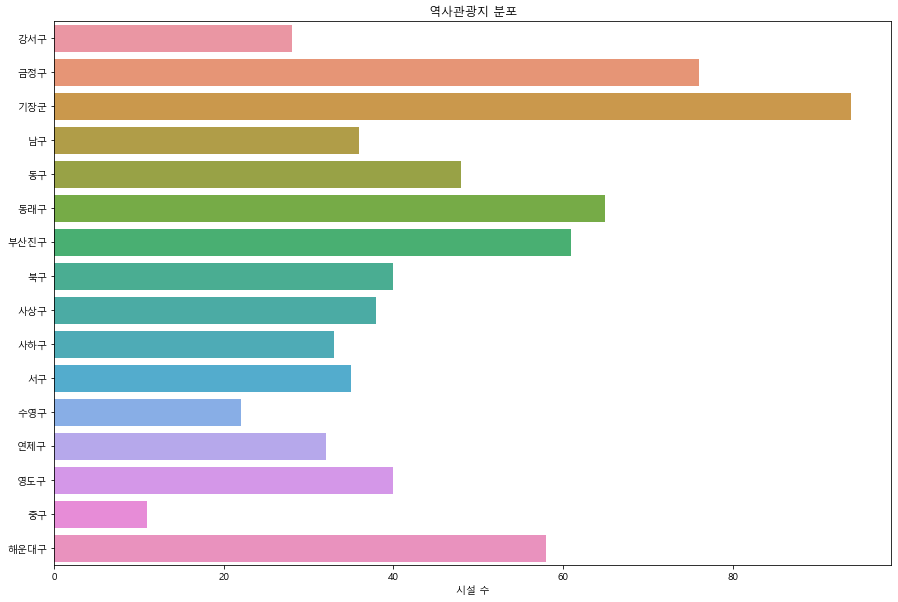

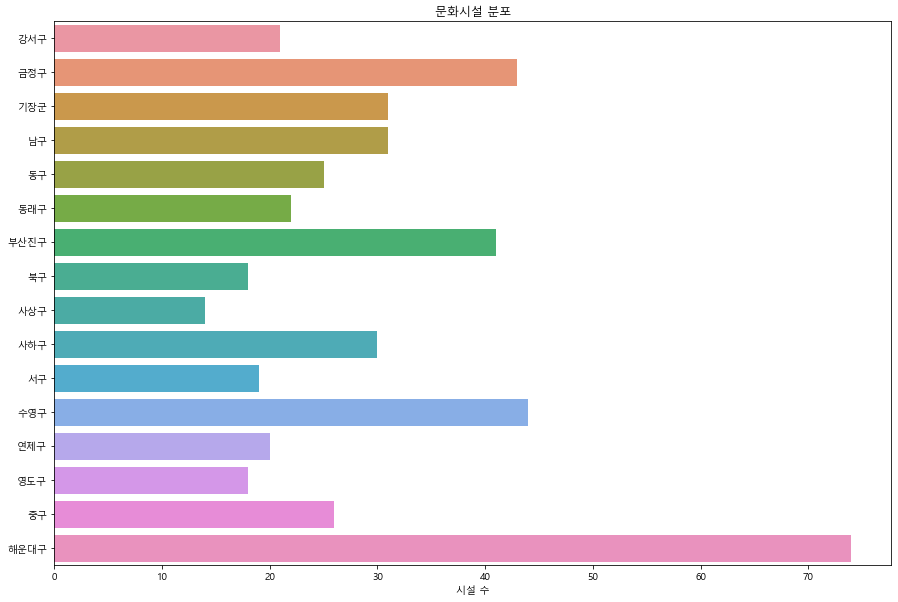

In [33]:
cate = new['중분류 카테고리'].unique()

for c in cate:
    
    # 그래프 사이즈 설정
    fig = plt.figure(figsize = (15, 10))
    
    # x축 y축에 넣을 컬럼 설정 / 기반 데이터 설정
    sns.barplot(y = '구군명', x = 'counts', data = new[new['중분류 카테고리'] == c], orient = 'h')
    
    # 그래프 제목 설정
    plt.title(str(c) + ' ' + '분포')
    
    # x, y축 이름 설정
    plt.xlabel('시설 수')
    plt.ylabel('')
    
    # 출력
    plt.show()
